<h1>IMPORTANDO AS BIBLIOTECAS QUE SERÃO USADAS NO PROJETO</h1>

In [6]:
#Celula contendo apenas as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [7]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

<h1>ANALISAREMOS O GRUPO :  http://dados.ufrn.br/group/ensino </h1>

In [8]:
docentes_url = "http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv"
docentes = pd.read_csv(docentes_url, sep=';')

avaliacao_docentes_url = 'http://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv'
avaliacao_docentes = pd.read_csv(avaliacao_docentes_url, sep=';')

In [9]:
docentes.rename(columns={'id_servidor': 'id_docente'}, inplace=True)

In [10]:
colunas = ['id_docente', 'lotacao', 'ano', 'postura_profissional_media', 'atuacao_profissional_media', 'autoavaliacao_aluno_media', 'admissao']

merge_docentes_avaliacao = pd.merge(docentes, avaliacao_docentes, on = 'id_docente')[colunas]

In [11]:
docentes_avaliacao_imd = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "INSTITUTO METROPOLE DIGITAL"]
docentes_avaliacao_imd.loc[:,'lotacao'] = "IMD"

docentes_avaliacao_dimap = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA"]
docentes_avaliacao_dimap.loc[:,'lotacao'] = "DIMAP"


In [12]:
#Avaliacoes 2013 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2013 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2013]
docentes_avaliacao_imd_2013 = docentes_avaliacao_imd_2013[~docentes_avaliacao_imd_2013.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2013 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2013]
docentes_avaliacao_dimap_2013 = docentes_avaliacao_dimap_2013[~docentes_avaliacao_dimap_2013.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2013 = pd.concat([docentes_avaliacao_dimap_2013, docentes_avaliacao_imd_2013])

In [13]:
#Avaliacoes 2014 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2014 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2014]
docentes_avaliacao_imd_2014 = docentes_avaliacao_imd_2014[~docentes_avaliacao_imd_2014.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2014 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2014]
docentes_avaliacao_dimap_2014 = docentes_avaliacao_dimap_2014[~docentes_avaliacao_dimap_2014.id_docente.duplicated()]
avaliacoes_2014 = pd.concat([docentes_avaliacao_dimap_2014, docentes_avaliacao_imd_2014])

In [14]:
#Avaliacoes 2015 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2015 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2015]
docentes_avaliacao_imd_2015 = docentes_avaliacao_imd_2015[~docentes_avaliacao_imd_2015.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2015 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2015]
docentes_avaliacao_dimap_2015 = docentes_avaliacao_dimap_2015[~docentes_avaliacao_dimap_2015.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2015 = pd.concat([docentes_avaliacao_dimap_2015, docentes_avaliacao_imd_2015])

In [15]:
#Avaliacoes 2016 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2016 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2016]
docentes_avaliacao_imd_2016 = docentes_avaliacao_imd_2016[~docentes_avaliacao_imd_2016.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2016 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2016]
docentes_avaliacao_dimap_2016 = docentes_avaliacao_dimap_2016[~docentes_avaliacao_dimap_2016.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2016 = pd.concat([docentes_avaliacao_dimap_2016, docentes_avaliacao_imd_2016])

In [16]:
#Avaliacoes 2017 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2017 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2017]
docentes_avaliacao_imd_2017 = docentes_avaliacao_imd_2017[~docentes_avaliacao_imd_2017.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2017 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2017]
docentes_avaliacao_dimap_2017 = docentes_avaliacao_dimap_2017[~docentes_avaliacao_dimap_2017.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2017 = pd.concat([docentes_avaliacao_dimap_2017, docentes_avaliacao_imd_2017])

In [17]:
admissao_ano_imd = []
docentes_avaliacao_imd.admissao = docentes_avaliacao_imd.admissao.astype(str)

for index, value in enumerate(docentes_avaliacao_imd.admissao):
    dt = value[:4]
    admissao_ano_imd.append(dt)

admissao_ano_imd = list(map(int, admissao_ano_imd))

docentes_avaliacao_imd.admissao = admissao_ano_imd

docentes_avaliacao_imd.pivot_table(index=["ano", "admissao"],
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)

atuacao_profissional_media  autoavaliacao_aluno_media  \
ano  admissao                                                          
2013 2005                        9.125000                   9.235000   
     2012                        8.902857                   8.760000   
     2013                        8.842222                   8.247778   
2014 2005                        9.112500                   8.962500   
     2012                        9.279375                   8.552187   
     2013                        9.279394                   8.455152   
     2014                        8.780455                   8.172955   
2015 2005                        9.400000                   8.575000   
     2012                        9.081875                   8.737500   
     2013                        8.987407                   8.357778   
     2014                        9.124200                   8.437200   
     2015                        9.354545                   8.824545   
2016 2005                        8.713333                   8.266667   
     2012                        9.108000                   8.568000   
     2013                        9.176923                   8.365769   
     2014                        9.249487                   8.445385   
     2015                        9.293182                   8.606818   
     2016                        9.125455                   8.307273   
2017 2012                        9.271250                   8.671250   
     2013                        9.268667                   8.707333   
     2014                        9.451765                   8.857647   
     2015                        9.434000                   8.812000   
     2016                        9.390000                   8.393333   
     2017                        9.640000                   9.213333   

               postura_profissional_media  
ano  admissao                              
2013 2005                        9.540000  
     2012                        9.395714  
     2013                        9.581111  
2014 2005                        9.312500  
     2012                        9.615000  
     2013                        9.626061  
     2014                        8.925000  
2015 2005                        9.577500  
     2012                        9.601250  
     2013                        9.447407  
     2014                        9.520600  
     2015                        9.854545  
2016 2005                        9.380000  
     2012                        9.828000  
     2013                        9.563462  
     2014                        9.606923  
     2015                        9.811818  
     2016                        9.406364  
2017 2012                        9.757500  
     2013                        9.542000  
     2014                        9.661176  
     2015                        9.760000  
     2016                        9.655833  
     2017                        9.773333

In [18]:
admissao_ano_dimap = []

docentes_avaliacao_dimap.admissao = docentes_avaliacao_dimap.admissao.astype(str)

for index, value in enumerate(docentes_avaliacao_dimap.admissao):
    dt = value[:4]
    admissao_ano_dimap.append(dt)

admissao_ano_dimap = list(map(int, admissao_ano_dimap))

docentes_avaliacao_dimap.admissao = admissao_ano_dimap

docentes_avaliacao_media_dimap = docentes_avaliacao_dimap.pivot_table(index=["ano", "admissao"],
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)

In [19]:
docentes_avaliacao_media_dimap

atuacao_profissional_media  autoavaliacao_aluno_media  \
ano  admissao                                                          
2013 1994                        9.570000                   8.890000   
     1996                        9.550000                   8.390000   
     1997                        8.720000                   8.120000   
     1999                        8.180000                   7.930000   
     2002                        8.624000                   8.168000   
     2004                        9.020000                   8.090000   
     2005                        9.165000                   8.890000   
     2006                        8.787500                   8.507500   
     2008                        8.850000                   8.365000   
     2009                        8.033333                   8.406667   
     2010                        9.145000                   8.640000   
     2011                        5.240000                   7.970000   
     2012                        9.206000                   8.844000   
     2013                        8.893333                   8.386667   
2014 1993                        9.215000                   8.530000   
     1994                        9.700000                   8.720000   
     1996                        9.665000                   8.510000   
     1997                        8.515000                   8.637500   
     1999                        8.746667                   8.460000   
     2002                        8.511000                   8.417000   
     2004                        7.410000                   7.670000   
     2005                        9.576000                   8.940000   
     2006                        9.073333                   8.587778   
     2008                        9.298333                   8.280000   
     2009                        8.618750                   8.535000   
     2010                        8.398000                   8.502000   
     2011                        9.150000                   9.190000   
     2012                        9.275000                   8.605000   
     2013                        8.380000                   8.311250   
     2014                        9.228571                   8.605714   
...                                   ...                        ...   
2016 1999                        8.290000                   8.365000   
     2002                        8.104545                   8.229091   
     2005                        8.834000                   8.658000   
     2006                        9.105000                   8.022500   
     2008                        8.676667                   8.405000   
     2009                        9.218333                   8.175000   
     2010                        7.743333                   8.556667   
     2011                        8.930000                   8.410000   
     2012                        9.472000                   8.694000   
     2013                        8.534000                   7.836000   
     2014                        9.363333                   8.677778   
     2015                        8.650000                   8.230000   
     2016                        9.466667                   8.420000   
2017 1993                        9.090000                   8.330000   
     1994                        9.010000                   8.130000   
     1996                        9.130000                   8.590000   
     1997                        8.555000                   8.825000   
     1999                        8.390000                   9.100000   
     2002                        8.473333                   8.516667   
     2005                        9.307500                   8.937500   
     2006                        9.615000                   8.425000   
     2008                        9.394000                   8.840000   
     2009                        9.255000              

In [20]:
docentes_avaliacao_media_dimap_2013 = docentes_avaliacao_media_dimap.loc[2013, 'atuacao_profissional_media']
docentes_avaliacao_media_dimap_2014 = docentes_avaliacao_media_dimap.loc[2014, 'atuacao_profissional_media']
docentes_avaliacao_media_dimap_2015 = docentes_avaliacao_media_dimap.loc[2015, 'atuacao_profissional_media']
docentes_avaliacao_media_dimap_2016 = docentes_avaliacao_media_dimap.loc[2016, 'atuacao_profissional_media']
docentes_avaliacao_media_dimap_2017 = docentes_avaliacao_media_dimap.loc[2017, 'atuacao_profissional_media']

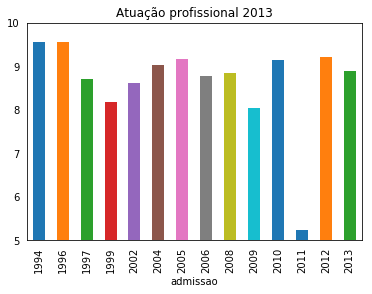

In [39]:

ax1 = docentes_avaliacao_media_dimap_2013.plot(kind='bar',y=["atuacao_profissional_media"],
                                title='Atuação profissional 2013')
ax1.set_ylim(5,10)
ax1.tick_params(bottom="off", top="off", left="off", right="off")

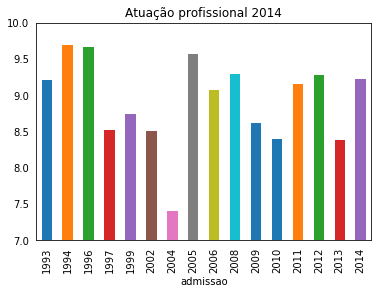

In [103]:
ax2 = docentes_avaliacao_media_dimap_2014.plot(kind='bar',y=["atuacao_profissional_media"],
                               title='Atuação profissional 2014')
ax2.set_ylim(7,10)
ax2.tick_params(bottom="off", top="off", left="off", right="off")

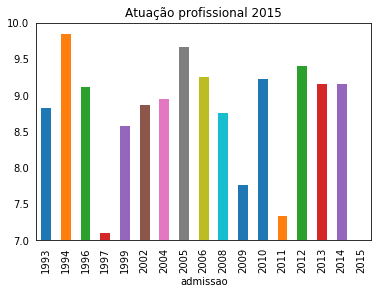

In [104]:
ax2 = docentes_avaliacao_media_dimap_2015.plot(kind='bar',y=["atuacao_profissional_media"],
                               title='Atuação profissional 2015')
ax2.set_ylim(7,10)
ax2.tick_params(bottom="off", top="off", left="off", right="off")

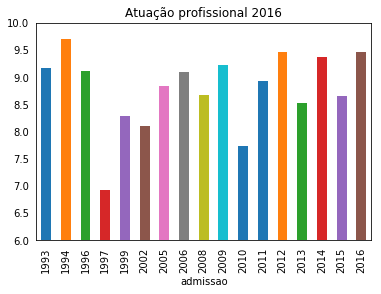

In [106]:
ax2 = docentes_avaliacao_media_dimap_2016.plot(kind='bar',y=["atuacao_profissional_media", "autoavaliacao_aluno_media"],
                               title='Atuação profissional 2016')
ax2.set_ylim(6,10)
ax2.tick_params(bottom="off", top="off", left="off", right="off")

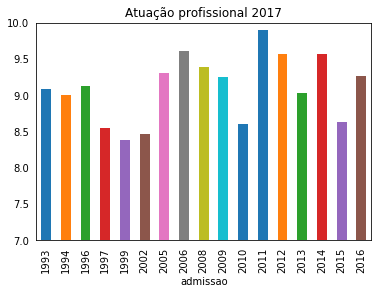

In [107]:
ax2 = docentes_avaliacao_media_dimap_2017.plot(kind='bar',y=["atuacao_profissional_media", "autoavaliacao_aluno_media"],
                               title='Atuação profissional 2017')
ax2.set_ylim(7,10)
ax2.tick_params(bottom="off", top="off", left="off", right="off")

In [61]:
avaliacoes_dimap = pd.concat([docentes_avaliacao_dimap_2013,docentes_avaliacao_dimap_2014,docentes_avaliacao_dimap_2015,docentes_avaliacao_dimap_2016,docentes_avaliacao_dimap_2017])
avaliacoes_imd = pd.concat([docentes_avaliacao_imd_2013,docentes_avaliacao_imd_2014,docentes_avaliacao_imd_2015,docentes_avaliacao_imd_2016,docentes_avaliacao_imd_2017])

avaliacoes = pd.concat([avaliacoes_dimap,avaliacoes_imd])

In [62]:
avaliacoes_dimap_media = avaliacoes_dimap.pivot_table(index="ano",
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)
anos= [2013,2014,2015,2016,2017]
avaliacoes_dimap_media['ano'] = anos
avaliacoes_dimap_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_dimap',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_dimap', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_dimap'}, inplace=True)

In [63]:
avaliacoes_imd_media = avaliacoes_imd.pivot_table(index="ano",
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)
anos= [2013,2014,2015,2016,2017]
avaliacoes_imd_media['ano'] = anos
avaliacoes_imd_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_imd',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_imd', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_imd'}, inplace=True)

In [64]:
avaliacoes_medias = pd.merge(avaliacoes_imd_media, avaliacoes_dimap_media)
avaliacoes_medias

,atuacao_profissional_media_imd,autoavaliacao_aluno_media_imd,postura_profissional_media_imd,ano,atuacao_profissional_media_dimap,autoavaliacao_aluno_media_dimap,postura_profissional_media_dimap
0,8.945556,8.494444,9.571111,2013,8.678800,8.446800,9.376800
1,9.236842,8.531053,9.593158,2014,8.860000,8.432813,9.485312
2,9.060000,8.508387,9.647097,2015,8.781786,8.414286,9.328214
3,9.141515,8.446667,9.594848,2016,8.692333,8.450000,9.424000
4,9.398000,8.754333,9.688667,2017,9.251786,8.733929,9.716429


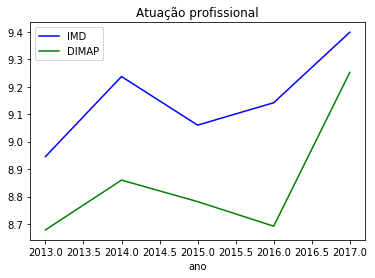

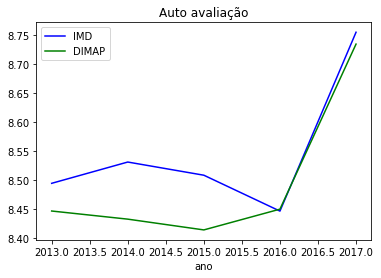

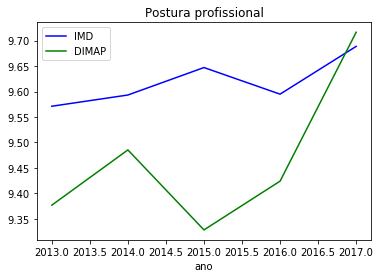

In [65]:
axe1 = avaliacoes_medias.plot(kind='line',x='ano',y=["atuacao_profissional_media_imd", "atuacao_profissional_media_dimap"],
                                title='Atuação profissional',
                                color=['blue', 'green']).\
                                    legend(loc='best',
                               labels=['IMD','DIMAP'])
    
avaliacoes_medias.plot(kind='line',x='ano',y=["autoavaliacao_aluno_media_imd", "autoavaliacao_aluno_media_dimap"],
                   title='Auto avaliação',
                   color=['blue', 'green']).\
                        legend(loc='best',
                               labels=['IMD','DIMAP'])
avaliacoes_medias.plot(kind='line',x='ano',y=["postura_profissional_media_imd", "postura_profissional_media_dimap"],
                   title='Postura profissional',
                   color=['blue', 'green']).\
                        legend(loc='best',
                               labels=['IMD','DIMAP'])